<a href="https://colab.research.google.com/github/Ashishpathak78/ML_-Practice/blob/Ashish/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures


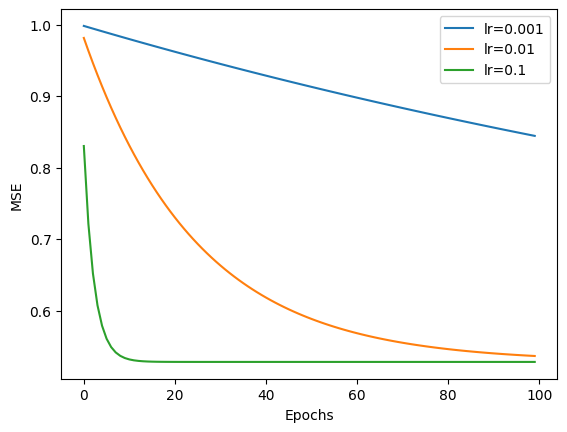

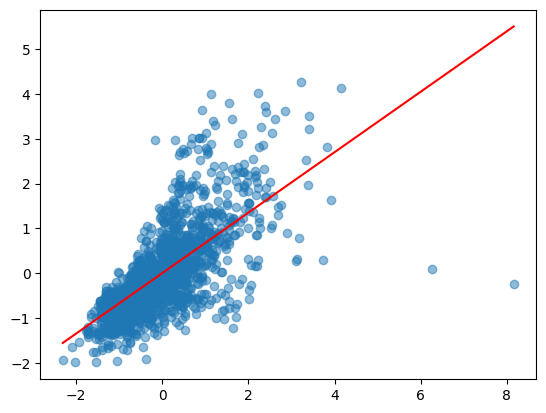

In [3]:

# Gradient Descent for Linear Regression on House Price Dataset
data = pd.read_csv("/content/train.csv")
data = data[["GrLivArea", "SalePrice"]]
data = data[data["SalePrice"] < 500000]
X = data["GrLivArea"].values
y = data["SalePrice"].values
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()
m = len(y)

def gradient_descent(X, y, lr, epochs):
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.zeros(2)
    cost_history = []
    for _ in range(epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= lr * gradients
        cost = np.mean((X_b.dot(theta) - y) ** 2)
        cost_history.append(cost)
    return theta, cost_history

for lr in [0.001, 0.01, 0.1]:
    theta, cost = gradient_descent(X, y, lr, 100)
    plt.plot(cost, label=f"lr={lr}")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

theta, _ = gradient_descent(X, y, 0.01, 200)
X_line = np.linspace(X.min(), X.max(), 100)
y_pred = theta[0] + theta[1] * X_line
plt.scatter(X, y, alpha=0.5)
plt.plot(X_line, y_pred, color='r')
plt.show()

LASSO Coefficients: [ 0.          1.72338582  1.70792014 -0.         -0.         -0.
 -0.19753417 -0.07648742 -0.         -0.02670556 -0.        ]
Ridge Coefficients: [ 0.          1.59067276  1.62901334  0.29989705  0.14297562 -0.11307109
 -0.18697089 -0.15029479 -0.14200505 -0.03015189  0.0540854 ]
LASSO MSE: 0.6482260637977296
Ridge MSE: 0.636899505166681


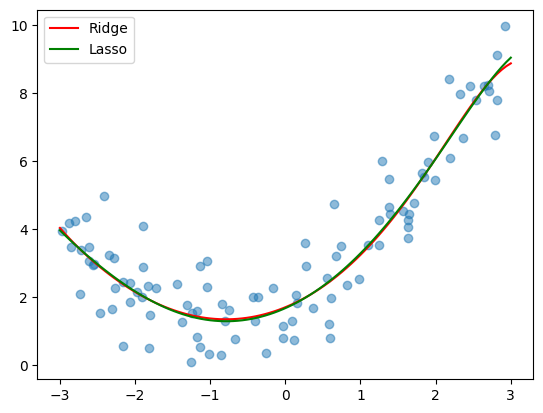

In [5]:
# Regularization (LASSO and RIDGE) on Nonlinear Data
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

print("LASSO Coefficients:", lasso.coef_)
print("Ridge Coefficients:", ridge.coef_)
print("LASSO MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))

X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
X_plot_poly = poly.transform(X_plot)
X_plot_poly = scaler.transform(X_plot_poly)
plt.scatter(X, y, alpha=0.5)
plt.plot(X_plot, ridge.predict(X_plot_poly), color='r', label="Ridge")
plt.plot(X_plot, lasso.predict(X_plot_poly), color='g', label="Lasso")
plt.legend()
plt.show()